In [ ]:
## NAME :  GÜNEŞ SERTKAYA
## TASK 1

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

#Reading data from link
data=pd.read_csv("http://bit.ly/w-data")
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


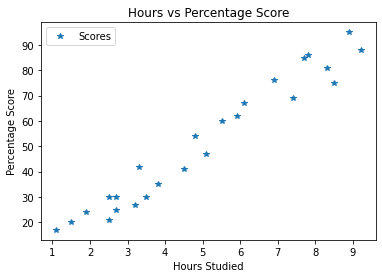

In [3]:
#Plotting the data on 2D graph
data.plot(x="Hours",y="Scores",style="*")
plt.title("Hours vs Percentage Score")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [4]:

#Checking for NULL Values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:

#Describing Data
data.info()
print()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes



,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:

X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101)

In [8]:

#Importing Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

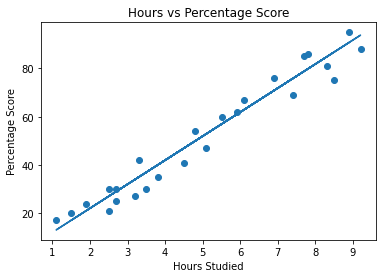

In [9]:

# Plotting Regression 
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.title("Hours vs Percentage Score")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

In [ ]:
## This line is the linear regression line

In [10]:
# Predicting for this input
print(X_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]
 [4.8]
 [3.2]
 [8.5]]


In [11]:
y_pred=lr.predict(X_test)
print(y_pred)

[27.01878177 78.84466226 39.97525189 75.85470762 56.91832821 49.94176737
 33.99534261 86.81787465]


In [12]:
#Comparing Predicted Values with Actual Values
data_verify=pd.DataFrame({'Prediction':y_pred,'Actual':y_test})
data_verify

,Prediction,Actual
0,27.018782,30
1,78.844662,85
2,39.975252,35
3,75.854708,69
4,56.918328,60
5,49.941767,54
6,33.995343,27
7,86.817875,75


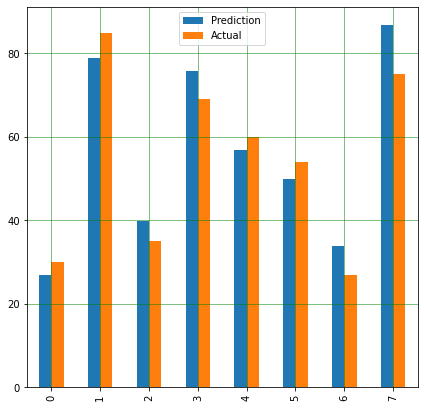

In [13]:
#Plotting difference between actual and predicted values
data_verify.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [ ]:
## What will be predicted score if a student studies for 9.25 hrs/ day?¶

In [14]:
hours=9.25
test=np.array([hours]).reshape(-1,1)
score_pred=lr.predict(test)
print('Score will be : ',score_pred)

Score will be :  [94.29276126]


In [ ]:
## Evaluating the model

In [15]:

from sklearn import metrics
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2 : ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error :  5.864954643694258
Mean Squared Error :  41.634865645528876
Root Mean Squared Error :  6.4525084769823335
R-2 :  0.8999124290533055
